In [1]:
df_train = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")

In [8]:
df_train["Dates"] = pd.to_datetime(df_train["Dates"])

In [12]:
df_train["Hour"] = df_train["Dates"].apply(lambda x: x.hour)
df_train["Month"] = df_train["Dates"].apply(lambda x: x.month)
df_train["Year"] = df_train["Dates"].apply(lambda x: x.year)

In [4]:
df_train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [5]:
df_test.describe()

,Id,X,Y
count,884262.000000,884262.000000,884262.000000
mean,442130.500000,-122.422693,37.771476
std,255264.596206,0.030985,0.484824
min,0.000000,-122.513642,37.707879
25%,221065.250000,-122.433069,37.752374
50%,442130.500000,-122.416517,37.775421
75%,663195.750000,-122.406959,37.784353
max,884261.000000,-120.500000,90.000000


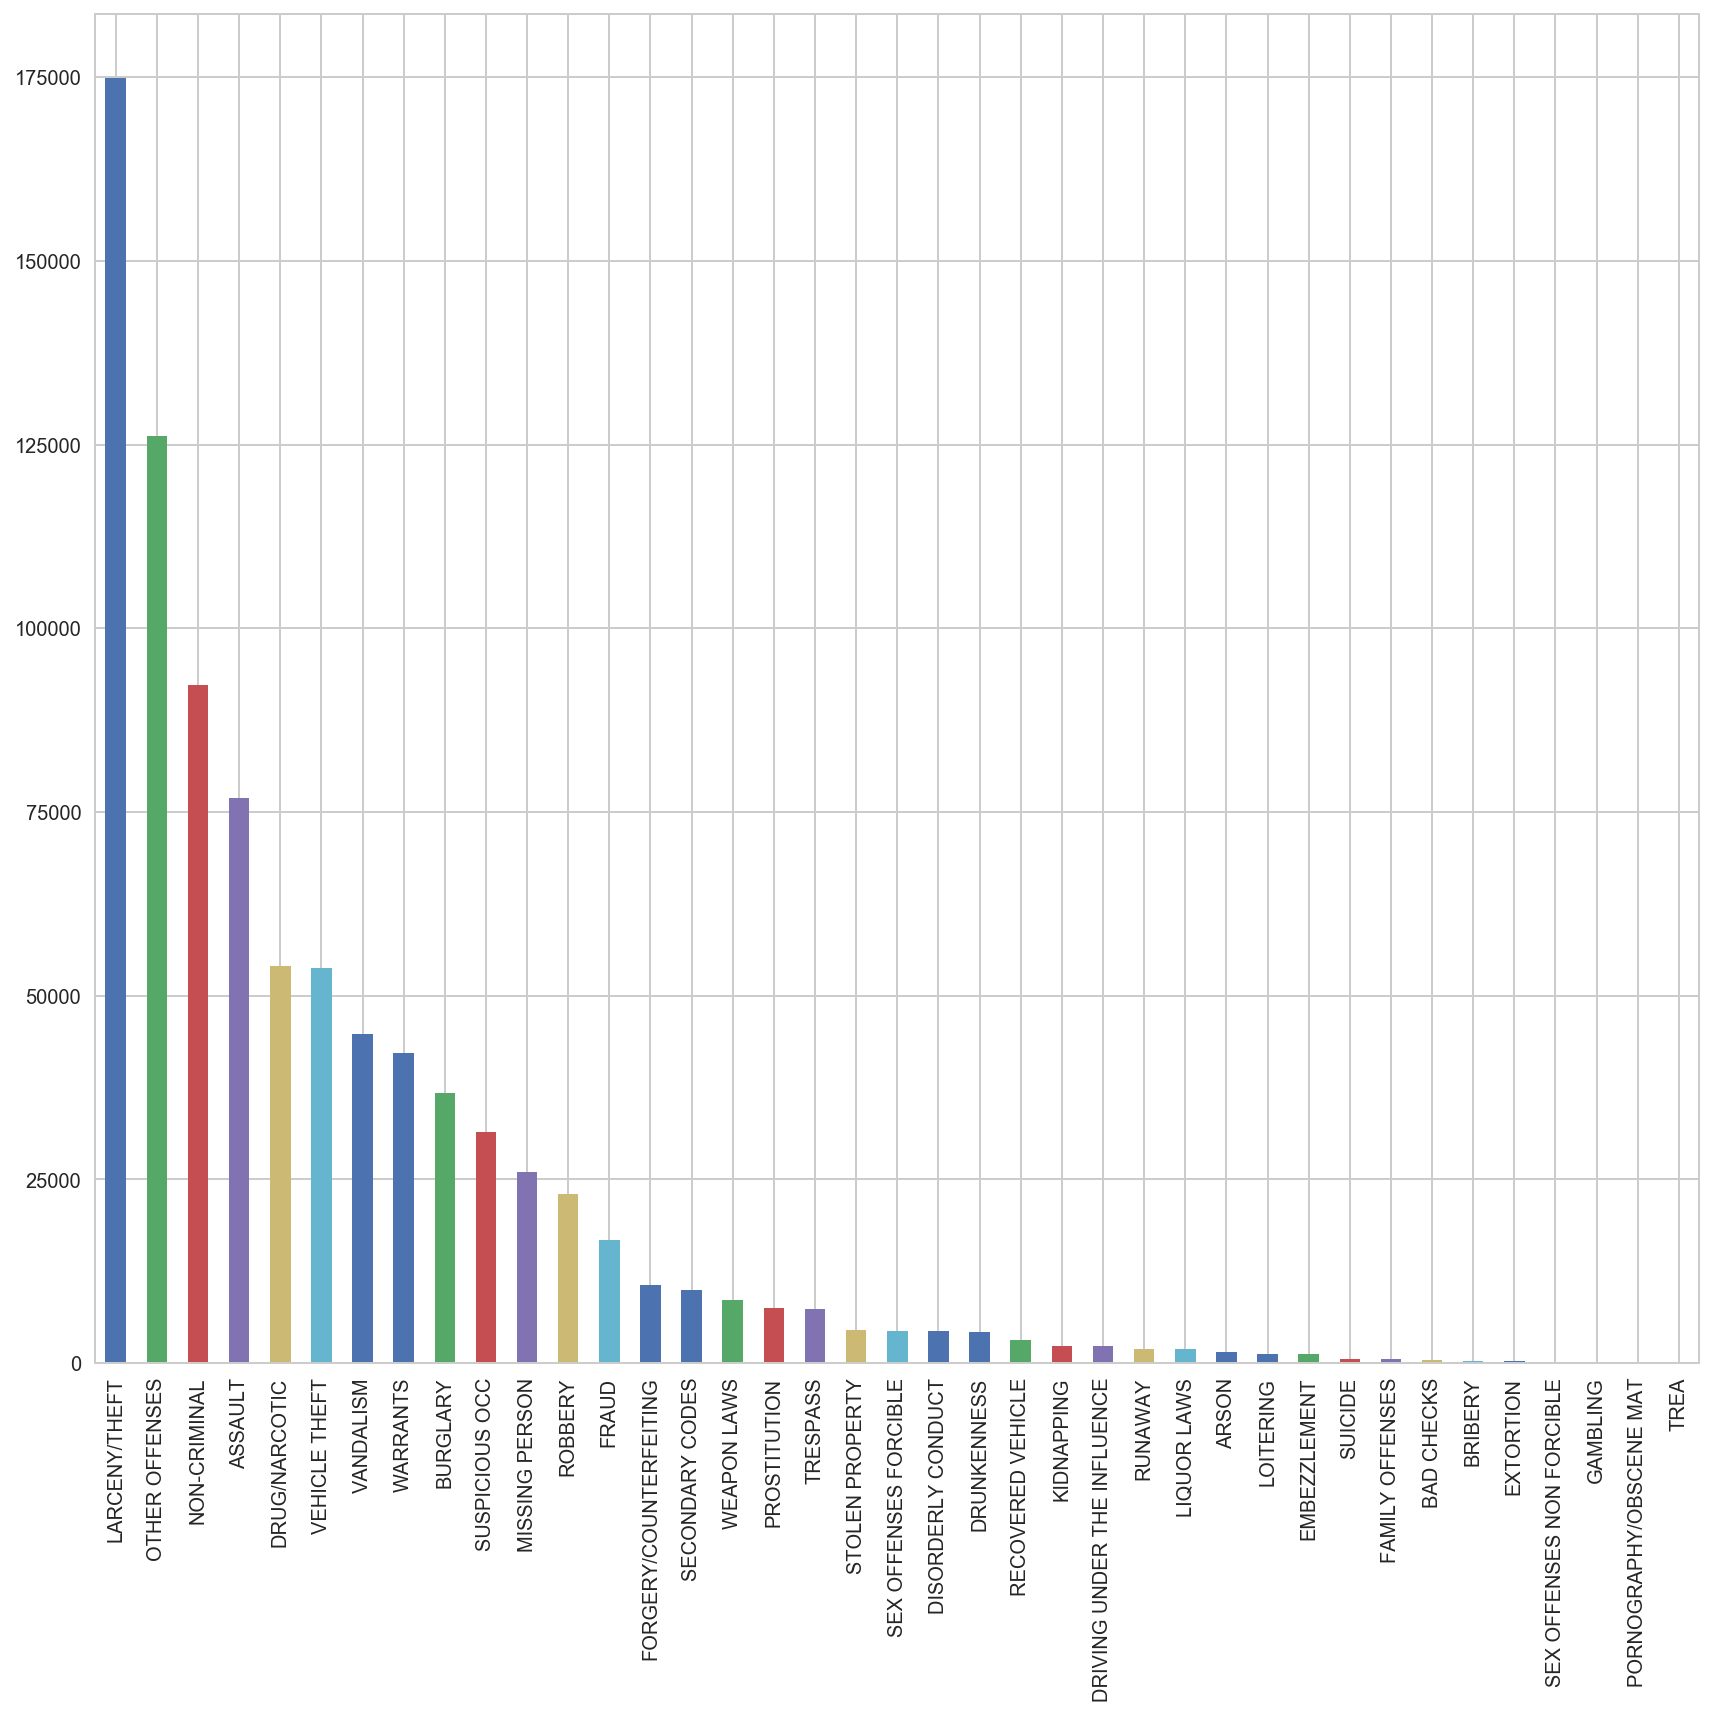

In [3]:
fig, ax  = plt.subplots(figsize=(12, 12))
df_train["Category"].value_counts().plot('bar')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
df_test.describe()

In [ ]:
df_train["Dates"]